# Instruções básicas da biblioteca Networkx

### Cria um novo grafo não direcionado (sem nós e arestas)

In [1]:
import networkx as nx
G = nx.Graph()

### Adiciona nós

In [2]:
G.add_node("Joao")
G.add_node("Maria")
G.add_node("Jose")
G.add_node("Fulano")

G.nodes()

NodeView(('Joao', 'Maria', 'Jose', 'Fulano'))

In [3]:
G.add_nodes_from([5, 6])

G.nodes()

NodeView(('Joao', 'Maria', 'Jose', 'Fulano', 5, 6))

In [4]:
G.add_nodes_from([
    (7, {"idade": 45}),
    (8, {"idade": 22}),
])

G.nodes(data=True)

NodeDataView({'Joao': {}, 'Maria': {}, 'Jose': {}, 'Fulano': {}, 5: {}, 6: {}, 7: {'idade': 45}, 8: {'idade': 22}})

### Adicionando atributos nos nós

In [16]:
G.nodes['Maria']['idade'] = 39

print(G.nodes(data=True))

print(G.nodes['Maria']['idade'])

[('Joao', {}), ('Maria', {'idade': 39}), ('Jose', {}), ('Fulano', {}), (6, {}), (7, {'idade': 45}), (8, {'idade': 22}), (5, {})]
39


### Adicionando arestas

In [52]:
G.add_edge('Joao', 'Maria')
G.add_edge('Jose', 6)
G.add_edge(7, 5)
G.add_edge(5, 'Fulano')
G.add_edge(6, 8)
G.add_edge('Fulano', 8)
G.add_edge('Joao', 8)

print(list(G.edges))

print(G.number_of_nodes())



[('Joao', 'Maria'), ('Joao', 'Fulano'), ('Joao', 8), ('Jose', 6), ('Fulano', 5), ('Fulano', 8), (6, 8), (7, 5)]
8


### Adicionando atributos nas arestas

In [13]:
G.edges['Joao', 'Maria']['mensagens'] = 40
G.edges['Jose', 6]['mensagens'] = 2

G.add_edge('Joao', 'Fulano', mensagens=15 )

print(list(G.edges(data=True)))

[('Joao', 'Maria', {'mensagens': 40}), ('Joao', 'Fulano', {'mensagens': 15}), ('Jose', 6, {'mensagens': 2}), ('Fulano', 5, {}), (7, 5, {})]


### Removendo elementos

In [7]:
G.remove_node(5)

G.nodes(data=True)

NodeDataView({'Joao': {}, 'Maria': {}, 'Jose': {}, 'Fulano': {}, 6: {}, 7: {'idade': 45}, 8: {'idade': 22}})

### Mostrando na tela um grafo

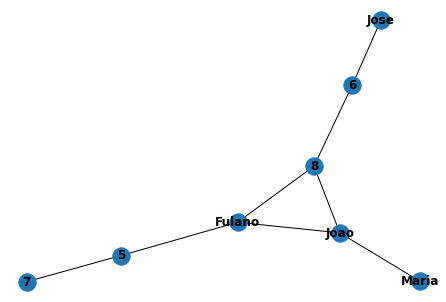

In [53]:
nx.draw(G, with_labels=True, font_weight='bold')

### Exportando um grafo

In [57]:
nx.write_gml(G, "redeExemplo.gml")

### Carregando um grafo existente

In [58]:
H = nx.read_gml("redeExemplo.gml")

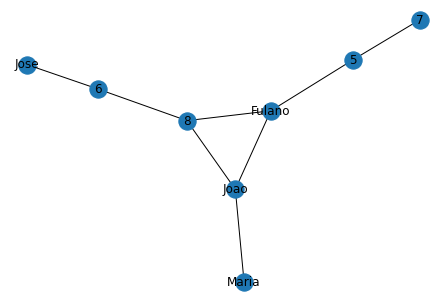

In [59]:
nx.draw(H, with_labels=True)

# Medidas importantes

### Grau dos nós

In [60]:
G.degree()

DegreeView({'Joao': 3, 'Maria': 1, 'Jose': 1, 'Fulano': 3, 6: 2, 7: 1, 8: 3, 5: 2})

### Visualizando a distribuição de graus

Text(0, 0.5, 'Numero de nós')

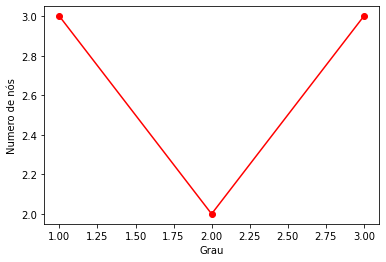

In [61]:
dicDegree = dict(G.degree() )
valores = sorted(set(dicDegree.values()))
valores

hist = [list(dicDegree.values()).count(x) for x in valores]


plt.plot(valores, hist, 'ro-') 

plt.xlabel('Grau')
plt.ylabel('Numero de nós')

### Coeficiente de agrupamento / clustering coeficient

In [62]:
print(nx.average_clustering(G))

0.125


In [63]:
print(nx.clustering(G))

{'Joao': 0.3333333333333333, 'Maria': 0, 'Jose': 0, 'Fulano': 0.3333333333333333, 6: 0, 7: 0, 8: 0.3333333333333333, 5: 0}


### Caminhos e outras medidas relacionadas

In [69]:
print(nx.average_shortest_path_length(G))

2.357142857142857


In [72]:
print(nx.diameter(G))

5


In [74]:
nx.is_connected(G)

True

In [76]:
nx.number_connected_components(G)

1

# Vários tipos de grafos

### Dirigidos

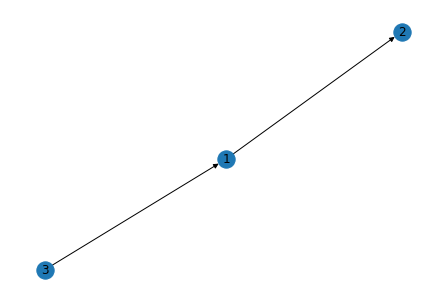

In [98]:
DG = nx.DiGraph()

DG.add_weighted_edges_from([(1, 2, 3), (3, 1, 2)])

nx.draw(DG, with_labels=True)

In [100]:
DG.out_degree(1, weight='weight')

3

In [102]:
DG.in_degree(1)

1

### Bipartidos
NetworkX não tem uma classe de grafo bipartido personalizado, mas as classes Graph () ou DiGraph () podem ser usadas para representar gráficos bipartidos. No entanto, você deve acompanhar a qual conjunto cada nó pertence e certificar-se de que não haja nenhuma aresta entre os nós do mesmo conjunto. A *convenção* usada no NetworkX é usar um atributo de nó denominado bipartite com valores 0 ou 1 para identificar os conjuntos aos quais cada nó pertence.

In [90]:
from networkx.algorithms import bipartite

B = nx.Graph()

#No exemplo, um conjunto vai ser de números e outro de letras

# Adiciona nós com o atributo "bipartido"
B.add_nodes_from([1, 2, 3, 4], bipartido=0)
B.add_nodes_from(["a", "b", "c"], bipartido=1)


B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

bipartite.is_bipartite(B)

True

In [91]:
#Adicionando uma aresta indevida
B.add_edge("b", "a")

bipartite.is_bipartite(B)

False